In [297]:
numNeighbors = 10
numPoints = 100
numClusters = 4

4

In [437]:
using MLJ, DataFrames
X, y = make_blobs(numPoints, numClusters; centers=4, cluster_std=[0.5, 0.5, 0.6, 0.75])
dfBlobs = DataFrame(X)

Row,x1,x2,x3,x4
,Float64,Float64,Float64,Float64
1,-2.49471,6.06348,-0.191861,2.64408
2,-2.46954,6.76836,-1.18144,2.93741
3,-1.38246,5.81533,-2.1012,3.13595
4,-2.29961,6.22561,-2.25308,4.10044
5,-5.01806,6.97141,5.71982,1.31333
6,-2.00586,6.62658,-1.6687,2.39823
7,-3.09786,-5.19037,1.78975,0.917163
8,-5.32969,8.64216,5.87822,2.54805
9,-9.69833,1.01413,-5.80165,-6.68715


In [438]:
data = dfBlobs[:,1:2]

Row,x1,x2
,Float64,Float64
1,-2.49471,6.06348
2,-2.46954,6.76836
3,-1.38246,5.81533
4,-2.29961,6.22561
5,-5.01806,6.97141
6,-2.00586,6.62658
7,-3.09786,-5.19037
8,-5.32969,8.64216
9,-9.69833,1.01413


In [439]:
x1 = dfBlobs[:,1]

100-element Vector{Float64}:
 -2.4947139453479457
 -2.469538977596617
 -1.3824592910484539
 -2.2996106111957455
 -5.0180624504502145
 -2.005864120052887
 -3.0978581208564644
 -5.329685444512713
 -9.698331381737978
 -3.2171077661903253
  ⋮
 -3.1465091070048152
 -2.960675739914826
 -4.605254731415424
 -1.8583058094073757
 -2.8658769340596
 -2.9860654990814037
 -9.890658094105794
 -4.0786981813907435
 -3.5702667162595025

In [440]:
x2 = dfBlobs[:,2]

100-element Vector{Float64}:
  6.063477726028925
  6.768356919644475
  5.8153295174682595
  6.225607115684421
  6.971411492064696
  6.626576497596299
 -5.190372544668838
  8.642163221699768
  1.0141299816186633
 -5.649918836411512
  ⋮
 -4.729304230479076
 -5.276568625058704
  7.420565564342464
  6.291148232405383
 -5.81141648874899
  5.835054418295742
  0.5475863098905867
  8.532509603421063
  5.638053622727131

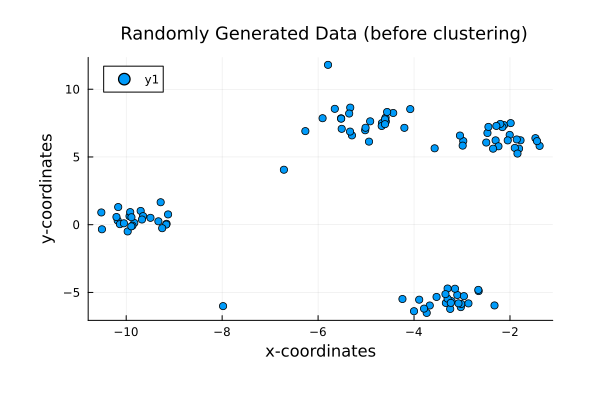

In [441]:
using Plots
using Plots.PlotMeasures
scatter(x1, x2, aspect_ratio=:equal)

scatter(x1, x2, xlabel="x-coordinates", ylabel="y-coordinates", title="\n Randomly Generated Data (before clustering)" , legend = true, titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)

In [442]:
using LinearAlgebra
data = transpose([x1 x2])

2×100 transpose(::Matrix{Float64}) with eltype Float64:
 -2.49471  -2.46954  -1.38246  -2.29961  …  -9.89066   -4.0787   -3.57027
  6.06348   6.76836   5.81533   6.22561      0.547586   8.53251   5.63805

In [443]:
using NearestNeighbors
kdtree = KDTree(data)

KDTree{StaticArraysCore.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 100
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [444]:
idx, dists = knn(kdtree, data, numNeighbors + 1, true)

([[1, 4, 53, 11, 91, 35, 97, 95, 2, 56, 28], [2, 83, 6, 69, 85, 4, 42, 20, 11, 1, 73], [3, 67, 50, 56, 28, 65, 95, 66, 11, 53, 91], [4, 11, 1, 53, 95, 6, 28, 2, 91, 35, 56], [5, 13, 44, 84, 33, 19, 94, 55, 39, 16, 64], [6, 95, 11, 28, 2, 4, 65, 69, 85, 67, 20], [7, 93, 70, 52, 86, 92, 10, 12, 30, 88, 75], [8, 14, 34, 47, 71, 61, 17, 36, 31, 39, 81], [9, 72, 40, 24, 98, 46, 82, 37, 68, 89, 22], [10, 75, 43, 52, 79, 62, 96, 86, 93, 7, 41]  …  [91, 53, 56, 1, 50, 4, 66, 97, 11, 35, 95], [92, 12, 70, 7, 88, 30, 93, 86, 52, 10, 75], [93, 7, 52, 70, 10, 30, 79, 96, 88, 75, 86], [94, 55, 84, 16, 81, 39, 31, 13, 64, 5, 36], [95, 28, 11, 6, 65, 67, 4, 56, 53, 3, 1], [96, 62, 79, 41, 75, 10, 43, 93, 51, 52, 21], [97, 35, 1, 100, 91, 42, 53, 4, 11, 2, 56], [98, 24, 40, 68, 89, 25, 72, 46, 54, 60, 9], [99, 36, 71, 31, 81, 16, 55, 39, 94, 8, 34], [100, 97, 35, 42, 1, 91, 53, 4, 18, 2, 11]], [[0.0, 0.25367548164410547, 0.37564056326082207, 0.4754676422807572, 0.47567130096429733, 0.4915116203676809,

In [445]:
idx

100-element Vector{Vector{Int64}}:
 [1, 4, 53, 11, 91, 35, 97, 95, 2, 56, 28]
 [2, 83, 6, 69, 85, 4, 42, 20, 11, 1, 73]
 [3, 67, 50, 56, 28, 65, 95, 66, 11, 53, 91]
 [4, 11, 1, 53, 95, 6, 28, 2, 91, 35, 56]
 [5, 13, 44, 84, 33, 19, 94, 55, 39, 16, 64]
 [6, 95, 11, 28, 2, 4, 65, 69, 85, 67, 20]
 [7, 93, 70, 52, 86, 92, 10, 12, 30, 88, 75]
 [8, 14, 34, 47, 71, 61, 17, 36, 31, 39, 81]
 [9, 72, 40, 24, 98, 46, 82, 37, 68, 89, 22]
 [10, 75, 43, 52, 79, 62, 96, 86, 93, 7, 41]
 ⋮
 [92, 12, 70, 7, 88, 30, 93, 86, 52, 10, 75]
 [93, 7, 52, 70, 10, 30, 79, 96, 88, 75, 86]
 [94, 55, 84, 16, 81, 39, 31, 13, 64, 5, 36]
 [95, 28, 11, 6, 65, 67, 4, 56, 53, 3, 1]
 [96, 62, 79, 41, 75, 10, 43, 93, 51, 52, 21]
 [97, 35, 1, 100, 91, 42, 53, 4, 11, 2, 56]
 [98, 24, 40, 68, 89, 25, 72, 46, 54, 60, 9]
 [99, 36, 71, 31, 81, 16, 55, 39, 94, 8, 34]
 [100, 97, 35, 42, 1, 91, 53, 4, 18, 2, 11]

In [446]:
idxMatrix = mapreduce(permutedims, vcat, idx)

100×11 Matrix{Int64}:
   1   4  53   11  91  35  97  95   2  56  28
   2  83   6   69  85   4  42  20  11   1  73
   3  67  50   56  28  65  95  66  11  53  91
   4  11   1   53  95   6  28   2  91  35  56
   5  13  44   84  33  19  94  55  39  16  64
   6  95  11   28   2   4  65  69  85  67  20
   7  93  70   52  86  92  10  12  30  88  75
   8  14  34   47  71  61  17  36  31  39  81
   9  72  40   24  98  46  82  37  68  89  22
  10  75  43   52  79  62  96  86  93   7  41
   ⋮                    ⋮                   ⋮
  92  12  70    7  88  30  93  86  52  10  75
  93   7  52   70  10  30  79  96  88  75  86
  94  55  84   16  81  39  31  13  64   5  36
  95  28  11    6  65  67   4  56  53   3   1
  96  62  79   41  75  10  43  93  51  52  21
  97  35   1  100  91  42  53   4  11   2  56
  98  24  40   68  89  25  72  46  54  60   9
  99  36  71   31  81  16  55  39  94   8  34
 100  97  35   42   1  91  53   4  18   2  11

In [447]:
neighbors = idxMatrix[:,2:numNeighbors + 1]

100×10 Matrix{Int64}:
  4  53   11  91  35  97  95   2  56  28
 83   6   69  85   4  42  20  11   1  73
 67  50   56  28  65  95  66  11  53  91
 11   1   53  95   6  28   2  91  35  56
 13  44   84  33  19  94  55  39  16  64
 95  11   28   2   4  65  69  85  67  20
 93  70   52  86  92  10  12  30  88  75
 14  34   47  71  61  17  36  31  39  81
 72  40   24  98  46  82  37  68  89  22
 75  43   52  79  62  96  86  93   7  41
  ⋮                    ⋮              
 12  70    7  88  30  93  86  52  10  75
  7  52   70  10  30  79  96  88  75  86
 55  84   16  81  39  31  13  64   5  36
 28  11    6  65  67   4  56  53   3   1
 62  79   41  75  10  43  93  51  52  21
 35   1  100  91  42  53   4  11   2  56
 24  40   68  89  25  72  46  54  60   9
 36  71   31  81  16  55  39  94   8  34
 97  35   42   1  91  53   4  18   2  11

In [448]:
adj = zeros(numPoints, numPoints)

100×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [449]:
for i in 1:numPoints 
  for j in 1:numNeighbors
    adj[i, neighbors[i, j]] = 1
    adj[neighbors[i, j], i] = 1
  end
end

In [450]:
adj

100×100 Matrix{Float64}:
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

In [451]:
degree = zeros(numPoints, numPoints)  

100×100 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [452]:
for i in 1:numPoints
  degree[i, i] = sum(adj[i,:])
end

In [453]:
degree

100×100 Matrix{Float64}:
 13.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  14.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  10.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  21.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  13.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  15.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  ⋮                             ⋮    ⋱         ⋮                      
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.

In [454]:
laplacian = degree - adj

100×100 Matrix{Float64}:
 13.0  -1.0   0.0  -1.0   0.0   0.0  …  -1.0   0.0  -1.0   0.0   0.0  -1.0
 -1.0  14.0   0.0  -1.0   0.0  -1.0      0.0   0.0  -1.0   0.0   0.0  -1.0
  0.0   0.0  10.0   0.0   0.0   0.0     -1.0   0.0   0.0   0.0   0.0   0.0
 -1.0  -1.0   0.0  21.0   0.0  -1.0     -1.0   0.0  -1.0   0.0   0.0  -1.0
  0.0   0.0   0.0   0.0  13.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   0.0  -1.0   0.0  15.0  …  -1.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0  -1.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0  -1.0   0.0   0.0   0.0   0.0
  ⋮                             ⋮    ⋱         ⋮                      
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0  -1.0   0.0   0.0   0.0   0.0
  0.

In [455]:
eigenval, eigenvec = eigen(laplacian)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
100-element Vector{Float64}:
 -5.270485410340287e-14
  2.1612179523910662e-15
  0.04446463745177098
  0.1314820402162944
  3.92514945825247
  4.28821390423678
  4.799002629520395
  5.0998362822377175
  6.200631461875062
  6.3304902851524005
  ⋮
 19.215239879170614
 20.186560418818612
 20.25995367596867
 21.227225418158337
 22.086502362411075
 22.1134058130855
 23.074662113598794
 23.083211348714865
 23.106556189617855
vectors:
100×100 Matrix{Float64}:
  0.0007309  0.115468     0.112871     …   0.0348003    -0.00472356
  0.0007309  0.115468     0.113323         0.0506317    -0.00682172
  0.0007309  0.115468     0.114755         0.0452031    -0.00631465
  0.0007309  0.115468     0.113592         0.129182     -0.0143502
  0.0007309  0.115468     0.0402486       -0.00708728   -0.0527096
  0.0007309  0.115468     0.114627     …   0.0499629    -0.00736681
 -0.199996   0.00126596   1.20354e-16      1.4098e-15   -3.50968e-16
  0

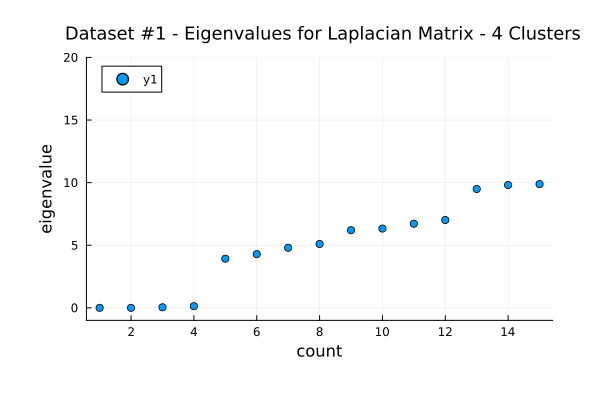

In [464]:
using Plots.PlotMeasures

scatter(collect(1:15), eigenval, xlabel="count", ylabel="eigenvalue", ylim=(-1,20), title="\n Dataset #1 - Eigenvalues for Laplacian Matrix - 4 Clusters",titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)


In [461]:
A = eigenvec[:,1:numClusters]

100×4 Matrix{Float64}:
  0.0007309  0.115468     0.112871      0.114918
  0.0007309  0.115468     0.113323      0.11634
  0.0007309  0.115468     0.114755      0.120789
  0.0007309  0.115468     0.113592      0.117178
  0.0007309  0.115468     0.0402486    -0.147884
  0.0007309  0.115468     0.114627      0.120396
 -0.199996   0.00126596   1.20354e-16  -5.84172e-16
  0.0007309  0.115468     0.041751     -0.161319
  0.0007309  0.115468    -0.161369      0.0426377
 -0.199996   0.00126596   1.15587e-16  -5.89266e-16
  ⋮                                    
 -0.199996   0.00126596   7.77283e-17  -3.03986e-16
 -0.199996   0.00126596   1.29165e-16  -5.93416e-16
  0.0007309  0.115468     0.0414867    -0.154218
  0.0007309  0.115468     0.114638      0.120428
 -0.199996   0.00126596   1.11022e-16  -5.68989e-16
  0.0007309  0.115468     0.112392      0.113414
  0.0007309  0.115468    -0.162477      0.0435432
  0.0007309  0.115468     0.0417869    -0.160665
  0.0007309  0.115468     0.0995165    

In [462]:
using RDatasets, Clustering
km = kmeans(transpose(A), numClusters)

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.19999599334650045 0.0007309002090005168 0.0007309002090015259 0.0007309002090008978; 0.0012659562972524314 0.11546774059541759 0.11546774059545736 0.11546774059547156; 1.1809849094492595e-16 0.11353490304278518 0.04082139860762054 -0.16248870582775107; -5.896876733049415e-16 0.1170117608973997 -0.15271844943001833 0.043557735947756915], [2, 2, 2, 2, 3, 2, 1, 3, 4, 1  …  2, 1, 1, 3, 2, 1, 2, 4, 3, 2], [4.823786128912988e-6, 4.95729485891494e-7, 1.576098758995781e-5, 3.0938481401787676e-8, 2.370214693904471e-5, 1.2647604334573015e-5, 0.0, 7.482884280392288e-5, 2.100730252585503e-6, 0.0  …  3.3839630706467005e-6, 0.0, 0.0, 2.6923991912619627e-6, 1.2885760983391559e-5, 0.0, 1.4251682444510472e-5, 3.383792829270149e-10, 6.4084508449469e-5, 0.0020624984799055973], [25, 25, 26, 24], [25, 25, 26, 24], 0.0065332029941768885, 2, true)

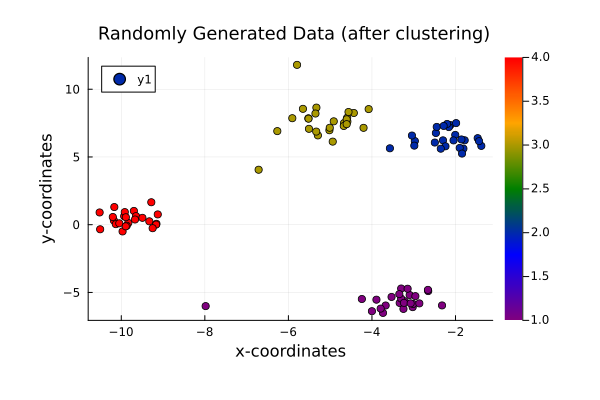

In [463]:
#scatter(x1, x2, marker_z=km.assignments, color=:rainbow, legend=false)

scatter(x1, x2, marker_z=km.assignments, color=:rainbow, xlabel="x-coordinates", ylabel="y-coordinates", title="\n Randomly Generated Data (after clustering)" , titlefont=font(12), bottom_margin = 10mm, top_margin = 5mm, left_margin = 10mm, right_margin = 10mm)